### **KMEAN FORM SCRATCH**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import random

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/kmeans/student_clustering.csv')

In [44]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


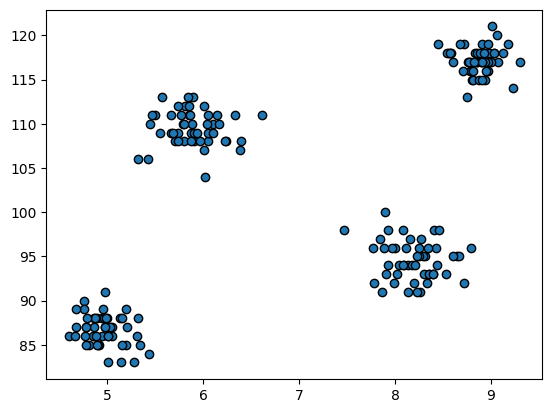

In [45]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],edgecolors='black')

In [46]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = []
    
    def fit(self, df):
        # Initialize centroids randomly
        x = random.sample(range(0, df.shape[0]), self.n_clusters)
        data = df.values
        self.centroids = data[x].copy()
        
        for iteration in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.clusters = []
            
            # Assign points to nearest centroid
            for i in range(len(data)):
                distances = []
                for j in range(self.n_clusters):
                    # Calculate Euclidean distance
                    dist = np.sqrt(np.sum((data[i] - self.centroids[j])**2))
                    distances.append(dist)
                
                closest_cluster = np.argmin(distances)
                self.clusters.append(closest_cluster)
            
            # Update centroids
            for j in range(self.n_clusters):
                # Get all points assigned to cluster j
                cluster_points = data[np.array(self.clusters) == j]
                if len(cluster_points) > 0:
                    # Update centroid as mean of assigned points
                    self.centroids[j] = np.mean(cluster_points, axis=0)
            
            # Check for convergence
            if np.allclose(old_centroids, self.centroids):
                print(f"Converged after {iteration + 1} iterations")
                break
    
    def predict(self):
        return self.clusters

In [47]:
km=KMeans(4)
km.fit(df)
y=km.predict()
len(y)

Converged after 6 iterations


200

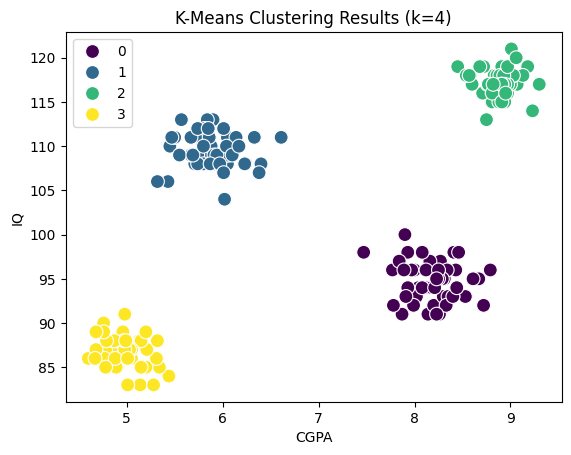

In [48]:
sns.scatterplot(x=df['cgpa'], y=df['iq'], hue=y, palette='viridis', s=100)
plt.title('K-Means Clustering Results (k=4)')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.show()
